# Exam 2, Problem 6

For the phreatic aquifer shown below, determine the rates of flow to the two streams and the
expressions describing the phreatic surface (h=f(x)) for $K_1=9$ m/d, $K_2=25$ m/d, $h_0=30$ m, $ℎ_{(𝑙_2
)}=20$ m and $W=600$ mm/yr. Determine the flow to the river at $x=0$.

![](Problem6.jpg)

## Solution:

For steady 1D flow in a homogenous unconfined aquifer with constant recharge, we know the head has the form

$$
h^2(x) = \frac{-W}{K} x^2 + C_1 x + C_2
$$
and the discharge per unit width of aquifer is 
$$
Q^{'}(x) = -\frac{K}{2} \frac{dh^2}{dx} 
$$
If we take  the bottom of the aquifer as $z=0$ then $h(x)$ is also the height of water in the unconfined aquifer, the phreatic surface. In this problem we have two materials (or two neighboring homogenous aquifers). Letting the function $h^2_I(x)=h^2(x)$ above be for material/aquifer I, we let

$$
h^2_II(x) = \frac{-W}{K} x^2 + C_3 x + C_4
$$

govern the second material. Then we have 4  unknowns so we need to see if we have 4 conditions (equations) to get a solveable system. These come from the known heads at the two rivers and the two conditions at the boundary between the two materials, which are continuity of the Darcy flux and continuity of the head:

$$
\begin{align}
h_I(x=0) &= 30^2 \\
h_{II}(x=3000)&=20^2 \\
h_I(x=1000) &= h_{II}(x=1000) \\
-\frac{K_1}{2} \frac{dh^2_{I}}{dx}(x=1000) &= -\frac{K_2}{2} \frac{dh^2_{II}}{dx}(x=1000)
\end{align}
$$

This yields four linear equations in four unknowns. The first equation yields immediately $C_2=900$, so really it's just three equations for the three unknowns $C_1, C_3,C_4$, which you can solve in an engineering calculator or by hand. Below I show how to solve in Python with the sympy package.

Note: If you don't have that formula memorized or on your formula sheet, it is not hard to derive. We know the discharge in a unit width of unconfied aquifer is $Q=1 h(x) q(x)$ and from mass conservation we have then

$$
\frac{d (hq)}{dx} = W
$$

and from Darcy's law we have

$$
\frac{d}{dx}\left(-hK \frac{dh}{dx}\right) = W
$$

We can integrate this twice to solve:

$$
\frac{d}{dx}\left(h \frac{dh}{dx}\right) = \frac{-W}{K}
$$
rearranging using $h \frac{dh}{dx} = \frac{1}{2} \frac{dh^2}{dx}$
$$
\int \frac{d}{dx}\left(\frac{dh^2}{dx}\right) dx = \int \frac{-2W}{K} dx
$$
$$
\frac{dh^2}{dx} = \frac{-2W}{K} x + C_1
$$
$$
\int \frac{dh^2}{dx} dx = \int \left( \frac{-2W}{K} x + C_1 \right) dx
$$
$$
h^2(x) =\frac{-W}{K} x^2 + C_1 x + C_2
$$

In [1]:
#import some  tools from sympy to
from sympy import symbols, solve, Eq

In [2]:
#set the known constants for this problem
K1=9 #m/d
K2=25 #m/d
h0=30 #m
h2=20 #m
W=600/1000/365 #m/d -- remember to convert to days from the given mm/y

In [3]:
C1,C2,C3,C4,x=symbols('C1,C2,C3,C4,x')

In [4]:
#in a hurry, you might just give it the 4 equations as a list and tell it to solve
solve(
    [(-W/K1)*0**2 + C1*0 + C2 - h0**2, 
     (-W/K2)*3000**2+C3*3000+C4 - h2**2, 
     (-W/K1)*1000**2 + C1*1000 + C2 - ((-W/K2)*1000**2+C3*1000+C4), 
     -0.5*K1*((-W/K1)*2*1000+C1) - (-0.5*K2*((-W/K2)*2*1000+C3))])

{C1: 0.121323139003929,
 C2: 900.000000000000,
 C3: 0.0436763300414145,
 C4: 860.751831793565}

In [5]:
#noting that dh^2/dx at x=0 is just C1,  compute the Darcy flux
print("Flux at (left) river", -0.5*K1*0.121323139003929)

Flux at (left) river -0.5459541255176805


# Alternative approach

A slightly nicer way to do this is to define the two solution functions for $h^2$ and define equations from them by substitutiong the boundary conditions

In [6]:
hhI = (-W/K1)*x**2 + C1*x + C2
hhII = (-W/K2)*x**2 + C3*x + C4
display(hhI,hhII)

C1*x + C2 - 0.000182648401826484*x**2

C3*x + C4 - 6.57534246575342e-5*x**2

In [7]:
s = [Eq(hhI.subs({'x':0}),h0**2), 
     Eq(hhII.subs({'x':3000}),h2**2), 
     Eq(hhI.subs({'x':1000}), hhII.subs({'x':1000})),
     Eq(-0.5*K1*hhI.diff(x).subs({'x':1000}), -0.5*K2*hhII.diff(x).subs({'x':1000}))]

In [8]:
for e in s:
    display(e)

Eq(C2, 900)

Eq(3000*C3 + C4 - 591.780821917808, 400)

Eq(1000*C1 + C2 - 182.648401826484, 1000*C3 + C4 - 65.7534246575342)

Eq(1.64383561643836 - 4.5*C1, 1.64383561643836 - 12.5*C3)

In [9]:
soln = solve(s)
soln

{C1: 0.121323139003929,
 C2: 900.000000000000,
 C3: 0.0436763300414144,
 C4: 860.751831793565}

In [10]:
QI = -0.5*K1*hhI.diff(x).subs({'C1':soln[C1], 'C2':soln[C2]})
QII = -0.5*K2*hhII.diff(x).subs({'C3':soln[C3], 'C4':soln[C4]})
QI, QII, QI.subs({'x':0.0})

(0.00164383561643836*x - 0.54595412551768,
 0.00164383561643836*x - 0.54595412551768,
 -0.545954125517680)

In [11]:
from matplotlib import pyplot as plt
import numpy as np

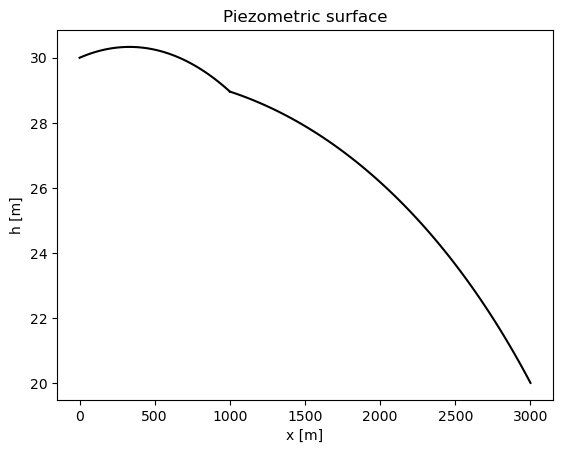

In [12]:
xI = np.linspace(0.0,1000,101)
hI = [(hhI.subs({'x':xi, 'C1':soln[C1], 'C2': soln[C2]}).n())**(0.5) for xi in xI]
xII = np.linspace(1000,3000,101)
hII = [(hhII.subs({'x':xi, 'C3':soln[C3], 'C4': soln[C4]}).n())**(0.5) for xi in xII]
plt.plot(xI,hI,'k-')
plt.plot(xII,hII,'k-')
plt.ylabel('h [m]')
plt.xlabel('x [m]')
plt.title("Piezometric surface")
plt.show()

Text(0.5, 1.0, 'Discharge per unit width')

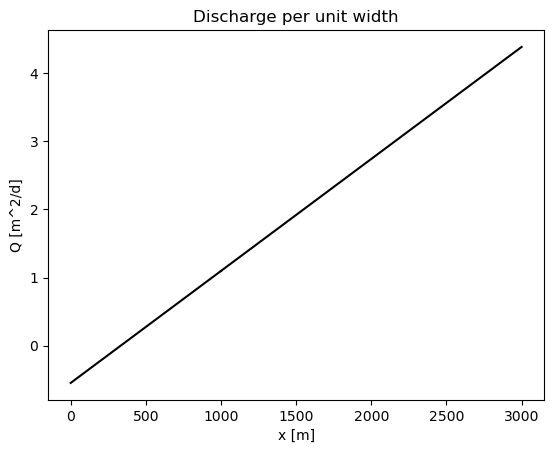

In [13]:
xI = np.linspace(0.0,1000,101)
QI_vs_x = [QI.subs({'x':xi, 'C1':soln[C1], 'C2': soln[C2]}).n() for xi in xI]
xII = np.linspace(1000,3000,101)
QII_vs_x = [QII.subs({'x':xi, 'C3':soln[C3], 'C4': soln[C4]}).n() for xi in xII]
plt.plot(xI,QI_vs_x,'k-')
plt.plot(xII,QII_vs_x,'k-')
plt.ylabel('Q [m^2/d]')
plt.xlabel('x [m]')
plt.title("Discharge per unit width")